In [56]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("loan.csv")
data = data.dropna()

In [73]:
# --- Preprocesare ---

# 1. Extragerea atributelor predictive si a atributului de clasa (Loan_Status)
#   - ignoram atributul Loan_ID deoarece reprezinta un id si este redundant
X, y = data.values[:,1:12], data.values[:,12]

# 2. Transformal datele ordinale in date numerice
enc = preprocessing.OrdinalEncoder()
enc.fit(y.reshape(-1,1))
y=enc.transform(y.reshape(-1,1)).flatten()
enc.fit(X)
X=enc.transform(X)

# 3. Partitionare in set de antrenare (60%) si testare (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### **1. Arbori de decizie**

In [60]:
# --- Construire clasificator ---
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

# --- Evaluare clasificator ---
pred = dt.predict(X_test)

dt_fpr, dt_tpr, dt_thresholds = metrics.roc_curve(y_test, pred)
dt_auc = metrics.auc(dt_fpr, dt_tpr)
dt_acc = dt.score(X_test, y_test)
print("fpr=", dt_fpr, "tpr=", dt_tpr, "thresholds=", dt_thresholds, "AuC=", dt_auc, "Accuracy=", dt_acc)
dt_CM = metrics.confusion_matrix(y_test, pred)
print("CM=", dt_CM)

fpr= [0.  0.4 1. ] tpr= [0.         0.85606061 1.        ] thresholds= [2. 1. 0.] AuC= 0.728030303030303 Accuracy= 0.7760416666666666
CM= [[ 36  24]
 [ 19 113]]


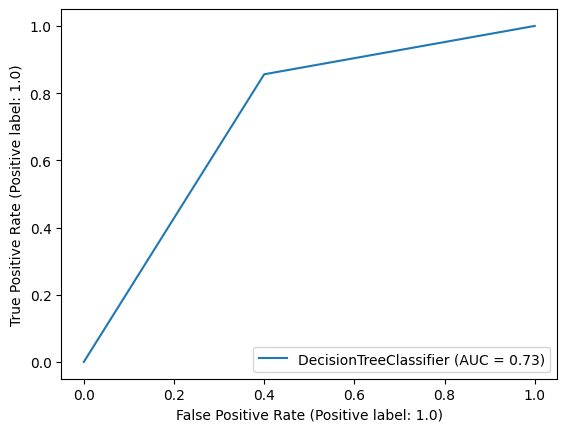

In [61]:
metrics.RocCurveDisplay.from_estimator(dt, X_test, y_test)
plt.show()

### **2. k Nearest Neighbours**

In [62]:
# --- Construire clasificator ---
kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(X_train, y_train)

# --- Evaluare clasificator ---
pred_kNN=kNN.predict(X_test)

kNN_fpr, kNN_tpr, kNN_thresholds = metrics.roc_curve(y_test, pred_kNN)
kNN_auc = metrics.auc(kNN_fpr, kNN_tpr)
kNN_acc = kNN.score(X_test, y_test)
print("fpr=", kNN_fpr, "tpr=", kNN_tpr, "thresholds=", kNN_thresholds, "AuC=", kNN_auc, "Accuracy=", kNN_acc)
kNN_CM = metrics.confusion_matrix(y_test, pred_kNN)
print("CM=", kNN_CM)

fpr= [0.         0.83333333 1.        ] tpr= [0.         0.82575758 1.        ] thresholds= [2. 1. 0.] AuC= 0.4962121212121212 Accuracy= 0.6197916666666666
CM= [[ 10  50]
 [ 23 109]]


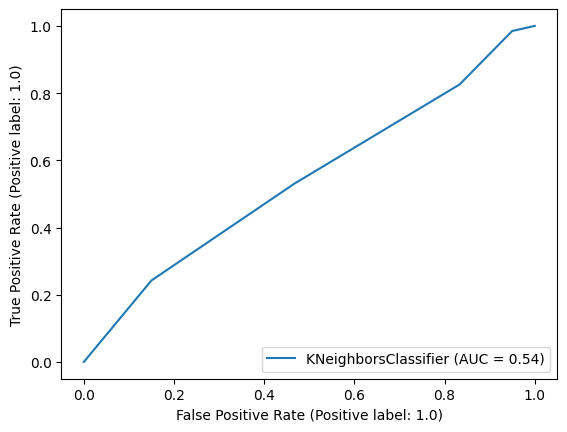

In [63]:
RocCurveDisplay.from_estimator(kNN, X_test, y_test)
plt.show()

### **3. Naive Bayes**

In [64]:
# --- Construire clasificator ---
clfNB = MultinomialNB()
clfNB.fit(X_train, y_train)

# --- Evaluare clasificator ---
pred_NB=clfNB.predict(X_test)

NB_fpr, NB_tpr, NB_thresholds = metrics.roc_curve(y_test, pred_NB)
NB_auc = metrics.auc(NB_fpr, NB_tpr)
NB_acc = clfNB.score(X_test, y_test)
print("fpr=", NB_fpr, "tpr=", NB_tpr, "thresholds=", NB_thresholds, "AuC=", NB_auc, "Accuracy=", NB_acc)
NB_CM = metrics.confusion_matrix(y_test, pred_NB)
print("CM=", NB_CM)

fpr= [0.         0.63333333 1.        ] tpr= [0.         0.75757576 1.        ] thresholds= [2. 1. 0.] AuC= 0.5621212121212121 Accuracy= 0.6354166666666666
CM= [[ 22  38]
 [ 32 100]]


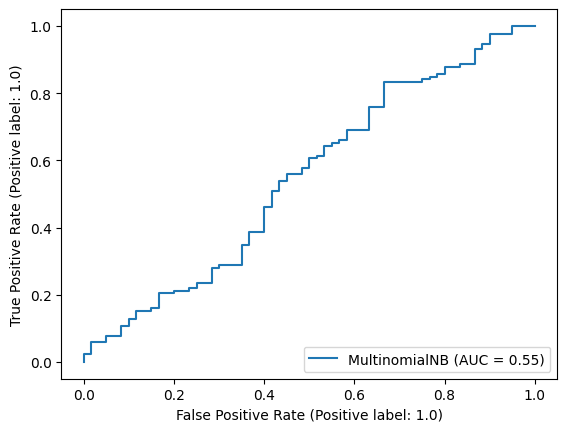

In [65]:
RocCurveDisplay.from_estimator(clfNB, X_test, y_test)
plt.show()

### **4. SVM**

In [66]:
# --- Construire clasificator ---
clfSVM = svm.SVC(kernel='rbf')
clfSVM.fit(X_train, y_train)

# --- Evaluare clasificator ---
pred_SVM=clfSVM.predict(X_test)

SVM_fpr, SVM_tpr, SVM_thresholds = metrics.roc_curve(y_test, pred_SVM)
SVM_auc = metrics.auc(SVM_fpr, SVM_tpr)
SVM_acc = clfSVM.score(X_test, y_test)
print("fpr=", SVM_fpr, "tpr=", SVM_tpr, "thresholds=", SVM_thresholds, "AuC=", SVM_auc, "Accuracy=", SVM_acc)
SVM_CM = metrics.confusion_matrix(y_test, pred_SVM)
print("CM=", SVM_CM)

fpr= [0. 1.] tpr= [0. 1.] thresholds= [2. 1.] AuC= 0.5 Accuracy= 0.6875
CM= [[  0  60]
 [  0 132]]


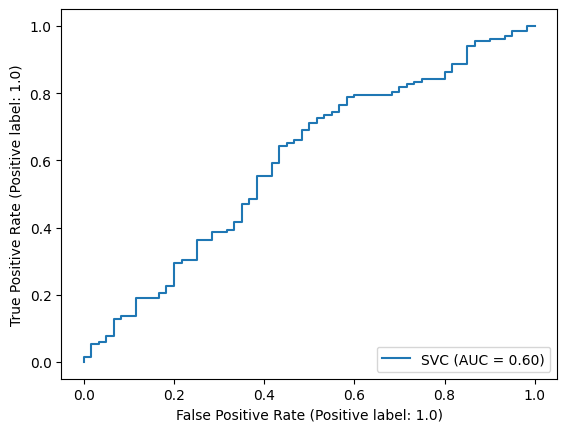

In [67]:
RocCurveDisplay.from_estimator(clfSVM, X_test, y_test)
plt.show()

### **5. Rețele neuronale**

In [71]:
# --- Construire clasificator ---
clfMLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clfMLP.fit(X_train, y_train)

# --- Evaluare clasificator ---
pred_MLP=clfMLP.predict(X_test)

MLP_fpr, MLP_tpr, MLP_thresholds = metrics.roc_curve(y_test, pred_MLP)
MLP_auc = metrics.auc(MLP_fpr, MLP_tpr)
MLP_acc = clfMLP.score(X_test, y_test)
print("fpr=", MLP_fpr, "tpr=", MLP_tpr, "thresholds=", MLP_thresholds, "AuC=", MLP_auc, "Accuracy=", MLP_acc)
MLP_CM = metrics.confusion_matrix(y_test, pred_MLP)
print("CM=", MLP_CM)

fpr= [0. 1.] tpr= [0. 1.] thresholds= [2. 1.] AuC= 0.5 Accuracy= 0.6875
CM= [[  0  60]
 [  0 132]]


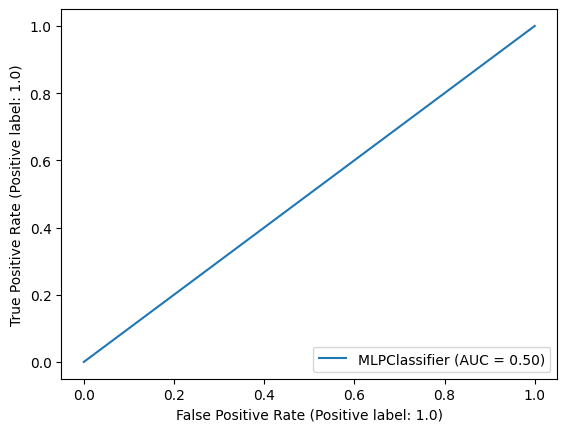

In [72]:
RocCurveDisplay.from_estimator(clfMLP, X_test, y_test)
plt.show()

### Acuratețe:


*   Arbori de decizie = 0.78
*   kNN = 0.62
*   Naive Bayes = 0.63
*   SVM = 0.69
*   Rețele neuronale = 0.69

